## Uczenie nadzorowane - klasyfikacja


Uczenie nadzorowane — klasyfikacja polega na trenowaniu modelu na danych wejściowych z przypisanymi etykietami, aby nauczył się rozpoznawać, do której klasy należy nowy, nieznany przykład. Model uczy się reguł, które pozwalają przypisać odpowiednią kategorię do nowych danych.

####  Wczytaj zbiór danych
####  Podziel zbiór danych na zbiór treningowy i testowy, dodatkowo w zmiennej X zapisz macierz zmiennych niezależnych, w zmiennej Y zapisz wektor zawierający informacje o tym jaki jest to typ wina (1, 2, 3).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv("wine.data", header = None)
display(data.head())

data.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols","Proanthocyanins", "Color intensity","Hue", "OD280/OD315 of diluted wines", "Proline"]
display(data.head())
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Dokonaj normalizacji danych. Skomentuj po co jest ten krok i jak może on wpływać na działania algorytmów z kolejnego punktu.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # przeksztalca dane tak zeby kazda kolumna miala mean 0 i std 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train_scaled)

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]], shape=(142, 13))

Normalzacja danych polega na przekształceniu wartości cech (features) tak, aby miały porównywalną skalę. ( u nas np są różne skale, np Proline około 700 - 1000+; Color intensity 1 - 10) Brak normalizacji mógłby zaburzyć działanie modeli. Dzięki normalizacji model uczy się bardziej efektywnie,  a wyniki klasyfikacji są bardziej wiarygodne.

### Wykonaj trening dla algorytmów KNeighborsClassifier oraz RandomForestClassifier (biblioteka scikit-learn)
### Wykonaj predykcje 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# knn
Knn = KNeighborsClassifier(n_neighbors= 6) # knn bierze 6 najblizszych sasiadow do podjecia decyzji
Knn.fit(X_train_scaled, Y_train)
Y_pred_Knn = Knn.predict(X_test_scaled)

# random forest
Rfc = RandomForestClassifier()
Rfc.fit(X_train_scaled, Y_train)
Y_pred_Rfc = Rfc.predict(X_test_scaled)


print("Dokładność KNN:", accuracy_score(Y_test, Y_pred_Knn))
print("Dokładność Random Forest:", accuracy_score(Y_test, Y_pred_Rfc))

Dokładność KNN: 0.9444444444444444
Dokładność Random Forest: 1.0


### Zapoznaj się z metrykami dostępnymi w: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics. Opisz o czym mówią i w jakim kontekście używamy: accuracy, precision, recall and F-measures, confusion matrix oraz napisz czym jest classification report. 

### Accuracy: 

Mierzy ogólną skuteczność modelu — jaki procent wszystkich przykładów został poprawnie sklasyfikowany.
Używamy go, gdy klasy są zrównoważone i pomyłki mają podobną wagę.

### Precision:

Sprawdza, spośród wszystkich przypadków zaklasyfikowanych do danej klasy, ile było poprawnych.
Używamy, gdy ważne jest ograniczenie liczby fałszywych alarmów.


### Recall and F-measures:

Recall - sprawdza ile rzeczywistych przykładów danej klasy model poprawnie wykrył
Recall = TP / (TP + FN)
TP: dobrze rozpoznane przypadki danej klasy
FN: przypadki danej klasy, których model nie rozpoznał

F-measure - Łączy precision i recall w jedną liczbę – to ich średnia harmoniczna
F1-score jest niski, jeśli choć jedna z tych metryk jest niska
F1 = 2 * (Precision * Recall) / (Precision + Recall)


### Confusion matrix:

Jest to tablica pokazująca, ile przykładów każdej klasy zostało poprawnie/niepoprawnie sklasyfikowanych.
Zawiera:
TP: trafione pozytywne
TN: trafione negatywne
FP: fałszywe alarmy
FN: przeoczenia
Używamy do dokładnej analizy, które klasy model najczęściej myli.

### Classification report:

Jest to wygodne podsumowanie zawierające: precision, recall, F1-score i support (liczbę próbek) dla każdej klasy.
Używamy do porównania jakości klasyfikacji między klasami.


### W nawiązaniu do metryk omawianych na wykładzie i tych analizowanych w punkcie 6. dokonaj analizy predykcji poszczególnych modeli. 

KNN
Confusion Matrix:


array([[14,  0,  0],
       [ 1, 12,  1],
       [ 0,  0,  8]])


Classification Report:


'              precision    recall  f1-score   support\n\n           1       0.93      1.00      0.97        14\n           2       1.00      0.86      0.92        14\n           3       0.89      1.00      0.94         8\n\n    accuracy                           0.94        36\n   macro avg       0.94      0.95      0.94        36\nweighted avg       0.95      0.94      0.94        36\n'


 RandomForest
Confusion Matrix:


array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])


Classification Report:


'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        14\n           3       1.00      1.00      1.00         8\n\n    accuracy                           1.00        36\n   macro avg       1.00      1.00      1.00        36\nweighted avg       1.00      1.00      1.00        36\n'

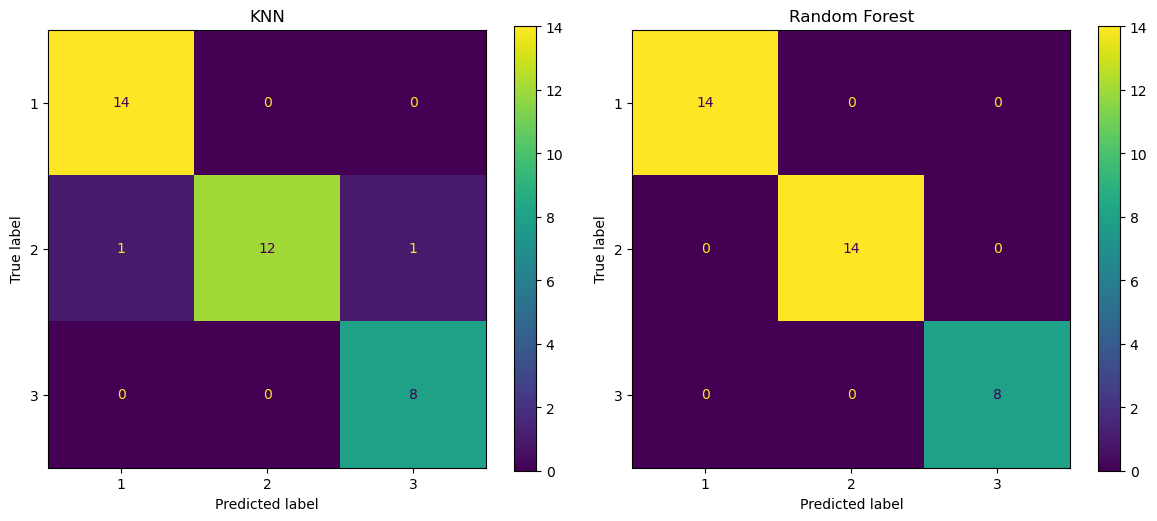

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# knn
print("KNN")
print("Confusion Matrix:")
display(confusion_matrix(Y_test, Y_pred_Knn))
print("\nClassification Report:")
display(classification_report(Y_test, Y_pred_Knn))

# random forest
print("\n RandomForest")
print("Confusion Matrix:")
display(confusion_matrix(Y_test, Y_pred_Rfc))
print("\nClassification Report:")
display(classification_report(Y_test, Y_pred_Rfc))


cm1 = confusion_matrix(Y_test, Y_pred_Knn, labels=Knn.classes_)
cm2 = confusion_matrix(Y_test, Y_pred_Rfc, labels=Rfc.classes_)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=Knn.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=Rfc.classes_)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))
disp1.plot(ax=axs[0])
disp2.plot(ax=axs[1])
axs[0].set_title("KNN")
axs[1].set_title("Random Forest")
plt.tight_layout()
plt.show()

### Interpretacja i wnioski

-  Random Forest uzyskał 100% skuteczność – wszystkie próbki zostały poprawnie sklasyfikowane, co świadczy o bardzo dobrej zdolności modelu do rozróżniania klas.
-  KNN osiągnął wysoką skuteczność (94%), ale popełnił błędy przy rozróżnianiu klasy 2 – prawdopodobnie z powodu podobieństw cech z klasami 1 i 3.
-  Random Forest lepiej radzi sobie w sytuacjach, gdzie granice między klasami nie są liniowe lub dane są bardziej złożone – dzięki losowości i agregacji wyników wielu drzew.
-  KNN jest wrażliwy na skalę i rozkład danych – nawet po normalizacji może mieć trudność w klasyfikacji przy mniejszych różnicach między klasami.
-  Random Forest wykazuje większą odporność na błędy i szumy w danych.
-  Dzięki wizualizacjom łatwo zobaczyć, że Random Forest jest dokładniejszy i bardziej niezawodny niż KNN w tym przypadku.

